<a href="https://colab.research.google.com/github/Vineeth37/ML/blob/main/KNN_class_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
df = pd.read_csv('breast-cancer.csv')
df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,...,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468,NaN
358,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431,NaN
463,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,24.02,82.68,495.1,0.1342,0.18080,0.18600,0.08288,0.3210,0.07863,NaN
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473,NaN
427,90745,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,...,32.04,83.69,489.5,0.1303,0.16960,0.19270,0.07485,0.2965,0.07662,NaN
172,87164,M,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,NaN
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,...,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df.sample(7)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
48,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,...,13.76,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301
217,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.057740,0.010710,0.1964,...,11.48,24.47,75.40,403.7,0.09527,0.13970,0.192500,0.03571,0.2868,0.07809
276,B,11.33,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,...,12.20,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.01111,0.2758,0.06386
284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.033900,0.1432,...,13.90,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.10170,0.1999,0.07127
430,M,14.90,22.53,102.10,685.0,0.09947,0.22250,0.273300,0.097110,0.2041,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.901900,0.24750,0.2866,0.11550
82,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.647600,0.28670,0.2355,0.10510
96,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,12.83,20.92,82.14,495.2,0.11400,0.09358,0.049800,0.05882,0.2227,0.07376


In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1}).astype(int)

In [ ]:
df.sample(7)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
515,1,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783
136,1,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.1046,0.06968,0.1712,0.07343
36,0,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140
497,1,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.10530,0.3035,0.07661
304,1,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,...,12.68,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638
6,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
534,1,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.2123,0.09861,0.2289,0.08278


In [ ]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train)

(455, 455)

In [ ]:
len(X_test),len(y_test)

(114, 114)

In [ ]:
# give the data to the Algorithm

from sklearn.neighbors import KNeighborsClassifier

reg = KNeighborsClassifier(n_neighbors=5)

reg.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
X_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [ ]:
y_train.head(2)

,diagnosis
68,1
181,0


In [ ]:
one = 0
zero = 0
for i in y_train:
  if i == 1:
    one = one + 1
  else:
    zero = zero + 1
print(one)
print(zero)

286
169


In [ ]:
# Train_performance y

y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
training_data = pd.DataFrame()
training_data = X_train.copy()
training_data['y_train_values'] = y_train
training_data['y_train_pred_value'] = y_train_pred

training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_pred_value
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,1


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in training_data.index:
  if training_data['y_train_values'][i] == 1 and training_data['y_train_pred_value'][i] == 1:
    tp = tp + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_value'][i] == 0:
    tn = tn + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_value'][i] == 1:
    fp = fp + 1
  else:
    fn=fn+1

print(f'True Positive : {tp}')
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')

True Positive : 281
True Negative : 147
False Positive : 22
False Negative : 5


In [ ]:
428 / 455

0.9406593406593406

In [ ]:
print(f'Train Accuracy : {(tp+tn) / (tp+tn+fp+fn)}')

Train Accuracy : 0.9406593406593406


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  5, 281]])

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9406593406593406

In [ ]:
# Test Performance
y_test_pred = reg.predict(X_test)

y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
y_test

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[38,  5],
       [ 0, 71]])

In [ ]:
(71 + 38) / 114

0.956140350877193

In [ ]:
accuracy_score(y_test,y_test_pred)

0.956140350877193

In [ ]:
reg.score(X_test,y_test)

0.956140350877193

In [ ]:
# selecting Best k_value

k = np.arange(3,101,2)
k

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
test_acc = []
for j in k:
  reg = KNeighborsClassifier(n_neighbors=j) # k_value 5
  reg.fit(X_train,y_train)
  test_acc.append(reg.score(X_test,y_test))


In [ ]:
test_acc

[0.9298245614035088,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9824561403508771,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.94736842105263

In [ ]:
test_acc.index(max(test_acc))

4

In [ ]:
k[test_acc.index(max(test_acc))]

11

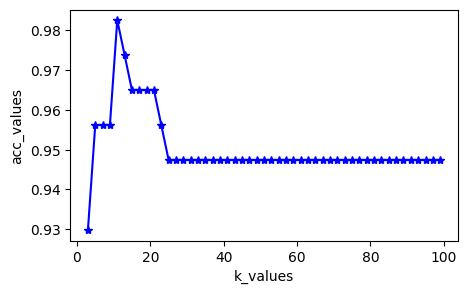

In [ ]:
plt.figure(figsize = (5,3))
plt.xlabel('k_values')
plt.ylabel('acc_values')
plt.plot(k,test_acc,color='b',marker='*')
plt.show()

**code with Best K_value**

In [ ]:
# give the data to the Algorithm

from sklearn.neighbors import KNeighborsClassifier

reg = KNeighborsClassifier(n_neighbors=11)

reg.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
X_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [ ]:
y_train.head(2)

,diagnosis
68,1
181,0


In [ ]:
one = 0
zero = 0
for i in y_train:
  if i == 1:
    one = one + 1
  else:
    zero = zero + 1
print(one)
print(zero)

286
169


In [ ]:
# Train_performance y

y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
training_data = pd.DataFrame()
training_data = X_train.copy()
training_data['y_train_values'] = y_train
training_data['y_train_pred_value'] = y_train_pred

training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_pred_value
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,0


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in training_data.index:
  if training_data['y_train_values'][i] == 1 and training_data['y_train_pred_value'][i] == 1:
    tp = tp + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_value'][i] == 0:
    tn = tn + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_value'][i] == 1:
    fp = fp + 1
  else:
    fn=fn+1

print(f'True Positive : {tp}')
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')

True Positive : 277
True Negative : 147
False Positive : 22
False Negative : 9


In [ ]:
428 / 455

0.9406593406593406

In [ ]:
print(f'Train Accuracy : {(tp+tn) / (tp+tn+fp+fn)}')

Train Accuracy : 0.9318681318681319


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  9, 277]])

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9318681318681319

In [ ]:
# Test Performance
y_test_pred = reg.predict(X_test)

y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
y_test

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[41,  2],
       [ 0, 71]])

In [ ]:
(71 + 38) / 114

0.956140350877193

In [ ]:
accuracy_score(y_test,y_test_pred)

0.9824561403508771

In [ ]:
reg.score(X_test,y_test)

0.9824561403508771

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
X_train.shape

(455, 30)

In [ ]:
test_point = np.random.rand(5,6).ravel()
test_point

array([0.46969005, 0.60615589, 0.06610396, 0.85257856, 0.13973163,
       0.36733037, 0.83715476, 0.39517959, 0.11650361, 0.1768155 ,
       0.84703271, 0.19095585, 0.08794946, 0.20944949, 0.48564715,
       0.19061297, 0.97647411, 0.6311321 , 0.18820376, 0.27679985,
       0.5031283 , 0.17036174, 0.48800336, 0.52409989, 0.49797344,
       0.5449163 , 0.80417907, 0.74072931, 0.92653947, 0.23054205])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
if reg.predict([test_point])[0] == 0:
  print(f'M')
else:
  print(f'B')

B
